# **Importing** all **the** **necessary** libraries

In [ ]:
import os
import cv2
import json
from glob import glob

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
from torchvision import transforms

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from glob import glob

drive_path = '/content/drive/MyDrive/leftImg8bit/train/aachen/*.png'
images = glob(drive_path)

# Data **Resolution** and **Channels**

In [ ]:
img_arr = cv2.imread(images[0])
height, width, channels = img_arr.shape
print(f"Image Dimensions: {width} x {height}")
print(f"Number of Channels: {channels}")

Image Dimensions: 2048 x 1024
Number of Channels: 3


In [ ]:
# Aspect Ratio
print(f'Aspect ratio is {width/height:.2f}')

Aspect ratio is 2.00


# Calculating the Composition

In [ ]:
cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
total_train_img = 0

for city in cities:
    drive_path = f'/content/drive/MyDrive/leftImg8bit/train/{city}/*.png'  # Using Google Drive path
    train_images = glob(drive_path)
    total_train_img += len(train_images)

print(total_train_img)

2975


In [ ]:
val_cities = ['frankfurt', 'lindau', 'munster']
total_val_img = 0

for city in val_cities:
    drive_path = f'/content/drive/MyDrive/leftImg8bit/val/{city}/*.png'  # Using Google Drive path
    val_images = glob(drive_path)
    total_val_img += len(val_images)

print(total_val_img)

500


In [ ]:
test_cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
total_test_img = 0

for city in test_cities:
    drive_path = f'/content/drive/MyDrive/leftImg8bit/test/{city}/*.png'  # Using Google Drive path
    test_images = glob(drive_path)
    total_test_img += len(test_images)

print(total_test_img)

1358


In [ ]:
total = total_train_img + total_val_img + total_test_img
print(f'Total Images are {total}')
print(f'Train images are {total_train_img*100/total:.2f}%')  # Line 1
print(f'Validation Images are {total_val_img*100/total:.2f}%')  # Line 2
print(f'Test Images are {total_test_img*100/total:.2f}%')  # Line 3

Total Images are 4833
Train images are 61.56%
Validation Images are 10.35%
Test Images are 28.10%


# Checking Pixel Intensity Distribution

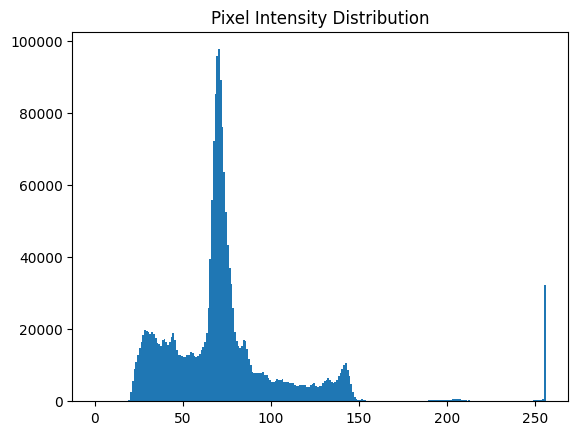

In [ ]:
img = cv2.imread('/content/drive/MyDrive/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title('Pixel Intensity Distribution')
plt.show()

# Checking Color Distribution in RGB

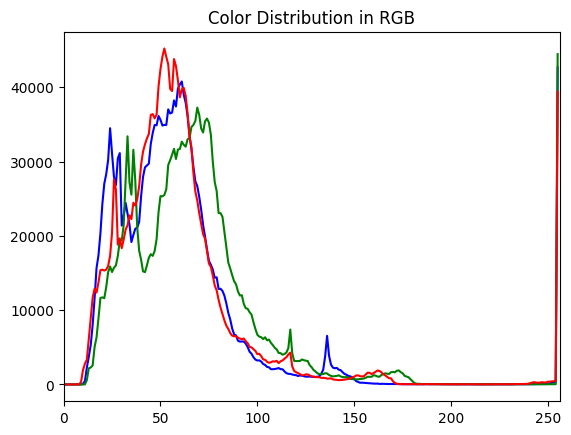

In [ ]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([cv2.imread(images[0])], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Distribution in RGB')
plt.show()

# Laplacian Blurriness Score

In [ ]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

blur_score = variance_of_laplacian(gray_image)
print(f"Blurriness Score: {blur_score}")

Blurriness Score: 48.25040710815517


# Edge Detection for Lane Analysis using Canny

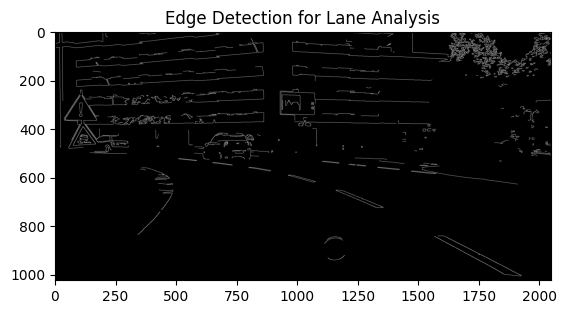

In [ ]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection for Lane Analysis')
plt.show()

# Resizing

In [ ]:
def resize_image(image_array, size=(512, 256)):

    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, size)
    return image_resized

In [ ]:
resized = resize_image(cv2.imread(images[0]), size=(512, 256))
print(resized)

[[[ 76  96  74]
  [ 88 105  82]
  [ 88 106  84]
  ...
  [ 46  29  19]
  [ 39  24  17]
  [ 32  22  16]]

 [[ 86 105  83]
  [ 66  89  68]
  [ 73  92  68]
  ...
  [ 46  30  20]
  [ 38  24  16]
  [ 33  23  15]]

 [[ 89 107  86]
  [ 87 107  85]
  [ 81  99  79]
  ...
  [ 47  31  20]
  [ 39  25  17]
  [ 32  22  16]]

 ...

 [[ 37  51  42]
  [ 40  52  42]
  [ 40  52  42]
  ...
  [ 45  60  50]
  [ 46  61  52]
  [ 48  62  53]]

 [[ 38  48  39]
  [ 36  48  38]
  [ 36  48  38]
  ...
  [ 44  60  48]
  [ 45  59  50]
  [ 44  58  49]]

 [[ 35  45  38]
  [ 34  46  39]
  [ 35  46  38]
  ...
  [ 42  54  47]
  [ 43  56  48]
  [ 45  57  49]]]


# Normalization

In [ ]:
def normalize_image(image):
    return image / 255.0
norm = normalize_image(resized)
print(norm)


[[[0.29803922 0.37647059 0.29019608]
  [0.34509804 0.41176471 0.32156863]
  [0.34509804 0.41568627 0.32941176]
  ...
  [0.18039216 0.11372549 0.0745098 ]
  [0.15294118 0.09411765 0.06666667]
  [0.1254902  0.08627451 0.0627451 ]]

 [[0.3372549  0.41176471 0.3254902 ]
  [0.25882353 0.34901961 0.26666667]
  [0.28627451 0.36078431 0.26666667]
  ...
  [0.18039216 0.11764706 0.07843137]
  [0.14901961 0.09411765 0.0627451 ]
  [0.12941176 0.09019608 0.05882353]]

 [[0.34901961 0.41960784 0.3372549 ]
  [0.34117647 0.41960784 0.33333333]
  [0.31764706 0.38823529 0.30980392]
  ...
  [0.18431373 0.12156863 0.07843137]
  [0.15294118 0.09803922 0.06666667]
  [0.1254902  0.08627451 0.0627451 ]]

 ...

 [[0.14509804 0.2        0.16470588]
  [0.15686275 0.20392157 0.16470588]
  [0.15686275 0.20392157 0.16470588]
  ...
  [0.17647059 0.23529412 0.19607843]
  [0.18039216 0.23921569 0.20392157]
  [0.18823529 0.24313725 0.20784314]]

 [[0.14901961 0.18823529 0.15294118]
  [0.14117647 0.18823529 0.14901961]


# Total images present in the dataset

In [ ]:

a = 0
b = 0
c = 0

base_path = '/content/drive/MyDrive/leftImg8bit/'

for i in ['train', 'val', 'test']:
    if i == 'train':
        for j in cities:
            im = glob(f'{base_path}{i}/{j}/*.png')
            for k in im:
                check_image(k)
                a = a + 1
    elif i == 'val':
        for j in val_cities:
            im = glob(f'{base_path}{i}/{j}/*.png')
            for k in im:
                check_image(k)
                b = b + 1
    else:
        for j in test_cities:
            im = glob(f'{base_path}{i}/{j}/*.png')
            for k in im:
                check_image(k)
                c = c + 1

print(a, b, c)

2975 500 1358
